In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier  # Importar RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score
from sklearn.metrics import roc_curve, auc

In [3]:
df = pd.read_csv("https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative&select=kepid,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr&format=csv")

In [4]:
kepler_data_clean = df.dropna().reset_index(drop=True)
kepler_clean = kepler_data_clean.drop(['kepid', 'kepoi_name'], axis=1)
kepler_clean = kepler_clean[kepler_clean['koi_disposition'] != 'CANDIDATE'].reset_index(drop=True)

In [5]:
etiqueta = LabelEncoder()
kepler_clean['koi_disposition'] = etiqueta.fit_transform(kepler_clean['koi_disposition'])

In [6]:
x = kepler_clean.drop('koi_disposition', axis=1).values
y = kepler_clean['koi_disposition'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [7]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
modelo = RandomForestClassifier(random_state=42)

modelo.fit(x_train_scaled, y_train)

scores = cross_val_score(modelo, x_train_scaled, y_train, cv=5)
print(f'Random Forest score = {scores.mean()} +/- {scores.std()}')

Random Forest score = 0.913579422811772 +/- 0.005442798147367864


In [10]:
y_predict = modelo.predict(x_test_scaled)

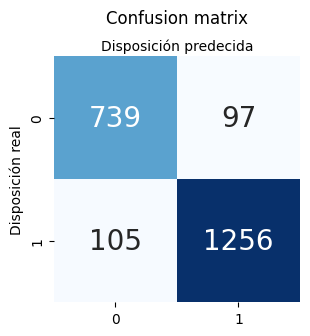

In [11]:
class_names = [0, 1]
fig, ax = plt.subplots(figsize=(3,3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_predict)), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={'size':20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Disposición real')
plt.xlabel('Disposición predecida')
plt.show()

In [12]:
print(f'Presición = {precision_score(y_test, y_predict)}')
print(f'Exactitud = {accuracy_score(y_test, y_predict)}')
print(f'Sensibilidad = {recall_score(y_test, y_predict)}')

Presición = 0.9283074648928308
Exactitud = 0.9080564406008192
Sensibilidad = 0.922850844966936
